In [ ]:
from notebooks import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The potoo.default_magic_magic extension is already loaded. To reload it, use:
  %reload_ext potoo.default_magic_magic


In [ ]:
# Default figsize for spectros
figsize(aspect=1/8);

In [ ]:
# Load model
search = Search.load_v0(
    'eval-na-dan170/split_i=0,train=2693,test=674,classes=170', 'n_species=170,n_recs=1.0',
    'cls=logreg_ovr,solver=liblinear,C=0.1,class_weight=balanced',
)
display(
    search,
    search.classifier_,
    len(search.classifier_.classes_),
)

Search(
  n_species=170,
  n_recs=1.0,
  classifier='cls: logreg_ovr,solver: liblinear,C: 0.1,class_weight: balanced',
  random_state=0,
  projection=Projection(
    features=Features(
      load=Load(channels=1, sample_rate=22050, sample_width_bit=16, cache_audio=True),
      sample_rate=22050,
      f_min=1000,
      f_bins=40,
      hop_length=256,
      frame_length=512,
      frame_window='hann',
      patch_length=4
    ),
    skm_fit_max_t=600000,
    k=500,
    variance_explained=0.99,
    do_pca=True,
    pca_whiten=True,
    standardize=False,
    normalize=False,
    agg_funs=['mean', 'std', 'max']
  )
)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

170

In [ ]:
# HACK FIXME Why doesn't search.projection.skm_ exist after unpickle?
projection = Projection.load('peterson-v0-26bae1c', features=Features(load=Load()))
features = projection.features
load = features.load
search.projection = projection
# These both work...
joblib_loads(joblib_dumps(projection)).skm_
joblib_loads(joblib_dumps(search)).projection.skm_

[01:25:42.819] DEBUG  Projection.load
  path: /Users/danb/hack/bubo/features/data/models/projection/peterson-v0-26bae1c.pkl


In [ ]:
user_recs = load_app_recs(projection,
    # n=10,
)
display(
    df_summary(user_recs).T,
    user_recs[:10],
)

[01:25:42.996] DEBUG  Load.audio:in
  len(recs): 164
  len(recs) per dataset: {recordings: 164}


[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[##                                                                                        ] | 2% Completed |  0.2s

[####################################################################                      ] | 76% Completed |  0.3s

[##########################################################################################] | 100% Completed |  0.5s

[01:25:43.507] DEBUG  Load.audio:out
  len(audio): 164


[01:25:44.832] WARN   Dropped 1 recs with duplicate audio_id


,recorded_at,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,audio_sha,id,path,audio,feat
audio_id,,,,,,,,,,,,,,,
20171007-c6f4,2017-10-07 15:18:04,recordings,BEWR,Bewick's Wren,BEWR,30.3,1.28,668860,BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2,Bewick's Wren - BEWR,c6f4dae698ffb4a89fc86f16534acc42cd22ffa9,recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2,recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2.wav,"box(unbox=recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot) 2: 1 channels, 16 bit, sampled @ 22.05 kHz, 30.334s long)",[ 4.983e-02 -9.263e-03 -5.601e-02 -3.380e-02 1.946e-02 9.371e-02 2.812e-02 -1.783e-02 8.781e-02 -8.130e-02\n -2.813e-02 -4.650e-02 -4.735e-02 -7.861e-02 -5.890e-02 1.4...
20171007-c6f4,2017-10-07 15:18:04,recordings,BEWR,Bewick's Wren,BEWR,30.3,1.28,668860,BEWR Bewicks Wren 2 (Coyote Hills parking lot),Bewick's Wren - BEWR,c6f4dae698ffb4a89fc86f16534acc42cd22ffa9,recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot),recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot).wav,"box(unbox=recordings/BEWR Bewicks Wren 2 (Coyote Hills parking lot): 1 channels, 16 bit, sampled @ 22.05 kHz, 30.334s long)",[ 4.983e-02 -9.263e-03 -5.601e-02 -3.380e-02 1.946e-02 9.371e-02 2.812e-02 -1.783e-02 8.781e-02 -8.130e-02\n -2.813e-02 -4.650e-02 -4.735e-02 -7.861e-02 -5.890e-02 1.4...


[01:25:44.880] DEBUG  Features.spectros:in
  len(recs): 163
  len(recs) per dataset: {recordings: 163}
  sum(duration_h): 3.29
  sum(samples_mb): 498.0
  sum(samples_n): 261204420
[                                                                                          ] | 0% Completed |  0.0s

[###############                                                                           ] | 16% Completed |  0.1s

[###########################################                                               ] | 48% Completed |  0.2s

[##############################################################                            ] | 69% Completed |  0.3s

[##########################################################################################] | 100% Completed |  0.4s

[01:25:45.326] DEBUG  Features.spectros:out
  (f, sum(t)): [40, 1020094]


,,,,,,,,min,25%,50%,75%,max
,dtype,sizeof,len,count,nunique,mean,std,,,,,
audio_id,object,11410,163,163,163.0,NaN,NaN,20160709-1e8c,20160910-3543,20171007-a787,20180513-1a88,20180805-60c3
recorded_at,datetime64[ns],1304,163,163,163.0,NaN,NaN,2016-07-09 18:38:51,2016-09-10 21:27:02,2017-10-07 15:18:55,2018-05-13 17:35:14,2018-08-05 15:57:16
dataset,object,10921,163,163,1.0,NaN,NaN,recordings,recordings,recordings,recordings,recordings
species,object,9943,163,163,35.0,NaN,NaN,AMBI,RTHA,_UNK,_UNK,_UNK
species_com_name,object,10933,163,163,35.0,NaN,NaN,American Bittern,Red-tailed Hawk,Unknown,Unknown,Wilson's Warbler
species_query,object,9943,163,163,35.0,NaN,NaN,AMBI,RTHA,_UNK,_UNK,_UNK
duration_s,float64,1304,163,163,158.0,NaN,NaN,2.75,19.1,48.8,90.8,691
samples_mb,float64,1304,163,163,158.0,NaN,NaN,0.115,0.804,2.05,3.82,29
samples_n,int64,1304,163,163,158.0,NaN,NaN,60544,421573,1076243,2002707,15229220


,recorded_at,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,audio_sha,id,path,audio,feat,spectro
audio_id,,,,,,,,,,,,,,,,
20160709-1e8c,2016-07-09 19:04:03,recordings,CALT,California Towhee,CALT,43.2,1.820,951746,CALT cal towhee,California Towhee - CALT,1e8c9cfe8f48560aa30173bb9f20aee30e7ecd71,recordings/CALT cal towhee,recordings/CALT cal towhee.wav,"box(unbox=recordings/CALT cal towhee: 1 channels, 16 bit, sampled @ 22.05 kHz, 43.163s long)",[ 2.035e-03 6.529e-02 2.609e-01 -8.920e-02 7.727e-02 2.055e-01 2.770e-02 -5.686e-02 4.625e-01 -4.459e-02\n -2.317e-01 1.583e-01 -7.546e-03 -1.656e-01 2.748e-02 -1.4...,
20160709-228d,2016-07-09 20:51:51,recordings,RTHA,Red-tailed Hawk,RTHA,42.1,1.770,928934,"RTHA red tailed hawk, noise",Red-tailed Hawk - RTHA,228d2414340927d1c8193963959bb82a6681e6db,"recordings/RTHA red tailed hawk, noise","recordings/RTHA red tailed hawk, noise.wav","box(unbox=recordings/RTHA red tailed hawk, noise: 1 channels, 16 bit, sampled @ 22.05 kHz, 42.129s long)",[ 1.452e-01 -3.292e-02 6.948e-01 -2.057e-02 -1.251e-02 -2.576e-02 4.741e-02 -4.145e-01 1.621e-01 -1.482e-01\n -1.505e-01 1.070e-01 -3.720e-02 -8.035e-02 -5.857e-03 1.3...,
20160709-4bb7,2016-07-09 19:57:52,recordings,_UNK,Unknown,_UNK,59.9,2.520,1320202,Recording 0019,Unknown - _UNK,4bb7924a5092f24d2fede40c339479b1befb6ac0,recordings/Recording 0019,recordings/Recording 0019.wav,"box(unbox=recordings/Recording 0019: 1 channels, 16 bit, sampled @ 22.05 kHz, 59.873s long)",[ 4.733e-02 2.485e-02 1.041e-01 -2.679e-02 2.001e-02 3.011e-03 9.353e-02 -1.986e-02 9.155e-02 -9.730e-02\n -2.053e-01 3.033e-01 -8.698e-03 -9.605e-02 9.715e-02 1.5...,
20160709-4e73,2016-07-09 19:07:43,recordings,WCSP,White-crowned Sparrow,WCSP,21.9,0.923,483910,WCSP white crowned,White-crowned Sparrow - WCSP,4e73e2c74b271647b5406c5784b8af1fd609b8eb,recordings/WCSP white crowned,recordings/WCSP white crowned.wav,"box(unbox=recordings/WCSP white crowned: 1 channels, 16 bit, sampled @ 22.05 kHz, 21.946s long)",[ 2.455e-02 -1.062e-02 9.811e-01 -9.299e-02 4.945e-02 -5.597e-02 5.669e-02 -2.279e-01 4.159e-01 -7.791e-02\n -1.896e-01 1.582e-01 -4.445e-02 -9.104e-02 6.175e-02 -1.1...,
20160709-59d3,2016-07-09 18:53:03,recordings,RTHA,Red-tailed Hawk,RTHA,30.6,1.290,674360,RTHA red tailed hawk,Red-tailed Hawk - RTHA,59d360c416f841fdc19213c1943c73b39992e241,recordings/RTHA red tailed hawk,recordings/RTHA red tailed hawk.wav,"box(unbox=recordings/RTHA red tailed hawk: 1 channels, 16 bit, sampled @ 22.05 kHz, 30.583s long)",[ 2.229e-02 -1.745e-02 7.496e-01 -5.046e-02 -3.577e-02 -4.409e-02 2.941e-04 -2.590e-01 2.597e-01 2.174e-02\n -1.398e-01 -4.891e-02 -5.807e-03 -9.787e-02 -1.195e-01 -1.8...,
20160709-795e,2016-07-09 20:34:26,recordings,_UNK,Unknown,_UNK,71.2,2.990,1569411,unknown sparrow (song?),Unknown - _UNK,795e65fdd0566f69ddfaa13bae28c5e6fde0d3f6,recordings/unknown sparrow (song?),recordings/unknown sparrow (song?).wav,"box(unbox=recordings/unknown sparrow (song?): 1 channels, 16 bit, sampled @ 22.05 kHz, 71.175s long)",[ 1.549e-01 -4.838e-02 1.737e-01 2.306e-02 3.237e-04 -4.025e-02 1.242e-01 -8.359e-02 2.388e-01 -9.303e-02\n -2.223e-01 2.008e-02 -1.347e-01 -4.654e-02 -5.248e-02 3.6...,
20160709-81dc,2016-07-09 20:59:19,recordings,HAWO,Hairy Woodpecker,HAWO,59.3,2.490,1307828,HAWO hairy woodpecker (2),Hairy Woodpecker - HAWO,81dc45758f7932931a1072df74422793bb083cda,recordings/HAWO hairy woodpecker (2),recordings/HAWO hairy woodpecker (2).wav,"box(unbox=recordings/HAWO hairy woodpecker (2): 1 channels, 16 bit, sampled @ 22.05 kHz, 59.312s long)",[ 6.210e-02 -3.008e-02 9.021e-03 -5.638e-02 1.596e-02 -4.143e-02 6.790e-02 -2.643e-02 1.448e-01 -8.180e-02\n -9.243e-02 1.103e-01 -3.034e-02 -3.102e-02 6.833e-02 -1.6...,
20160709-8c26,2016-07-09 19:51:42,recordings,_UNK,Unknown,_UNK,72.1,3.030,1589856,Recording 0018,Unknown - _UNK,8c26390858462d8ccfad92be14e1758014f54c12,recordings/Recording 0018,recordings/Recording 0018.wav,"box(unbox=recording

In [ ]:
# TODO -> util (or model)
def rec_neighbors(query_rec, search_recs, projection, k=10):
    if k is None:
        k = len(search_recs)
    search_recs = search_recs.reset_index()
    feat = Search.X
    knn = sk.neighbors.NearestNeighbors().fit(feat(search_recs))  # TODO Fit once and reuse
    ([dist], [rec_i]) = knn.kneighbors(
        feat(pd.DataFrame([query_rec])),
        n_neighbors=k,
    )
    return (search_recs.loc[rec_i]
        .assign(dist=dist)
        .pipe(df_reorder_cols, first=['dist'])
    )

# Query against user recs

20180805-60c3  2018-08-05T15:57:16  BEWR  23.7s  BEWR - vollmer peak+a6ade235


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
species,PUFI,OATI,LISP,BARS,DOWO,BEWR,HUVI,BAWW,GCWA,LASP,PISI,RCSP,RCKI,AMRO,BTPI
p,0.321,0.158,0.099,0.0827,0.0569,0.0448,0.0341,0.0335,0.0259,0.024,0.0157,0.0144,0.011,0.00926,0.00652


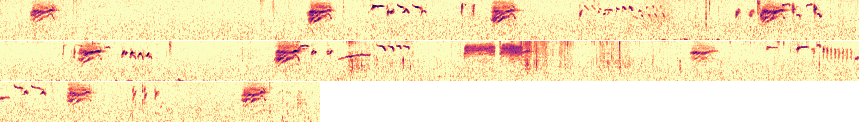

In [ ]:
query_rec = (user_recs
    .loc['20180805-60c3']  # BEWR
    .pipe(projection.with_audio, lambda audio: audio[6500:])
)
print(rec_str_line(query_rec))
display(rec_probs(query_rec, search, 15))
plot_spectro_micro(query_rec, features, wrap=True,
    show_audio=False,
    # limit_s=60,
)

 43.9  20170819-8661  2017-08-19T16:27:21  _UNK  4.7s  UNK_20170819_092720


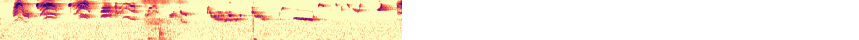

 45.0  20170514-94f6  2017-05-14T15:59:19  _UNK  127.8s  various (community garden by christopher playground)


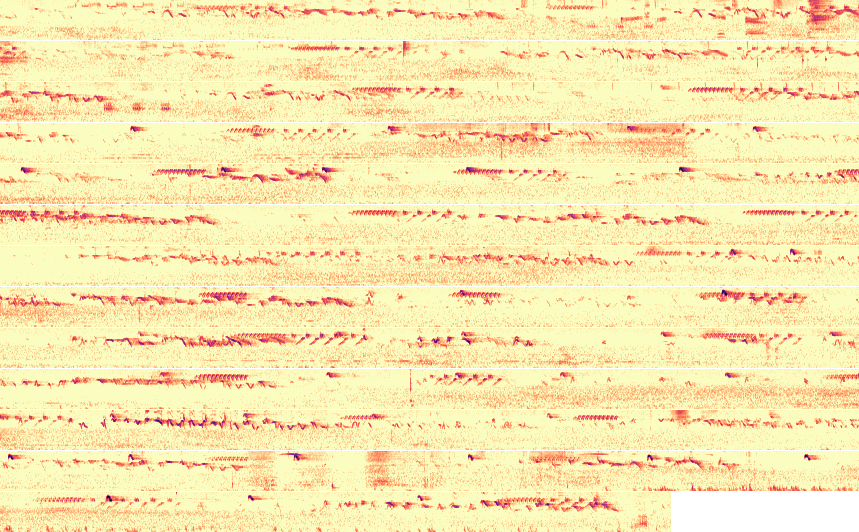

 45.7  20171007-602c  2017-10-07T15:20:39  BEWR  46.5s  BEWR Bewicks Wren (Coyote Hills parking lot)


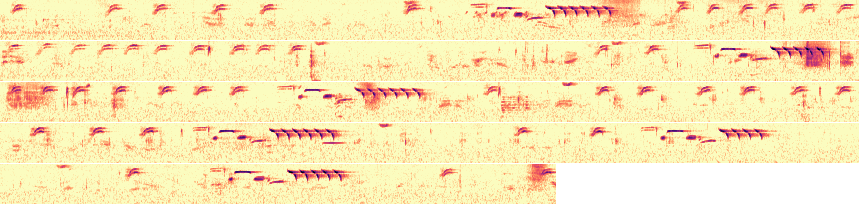

In [ ]:
results = rec_neighbors(query_rec, user_recs, projection,
    k=3,
    # k=30,
)
for result in df_rows(results):
    print(rec_str_line(result, ('dist', '%5.1f')))
    plot_spectro_micro(result, features,
        show_audio=False,
        # wrap=False,
    )

# Load xc recs

In [ ]:
# TODO Clean this up (how much complexity can we encapsulate and hide in functions vs. how much do we need to surface here?)

In [ ]:
# Select recs
#   1. countries: Filter recs to these countries
#   2. species: Filter recs to these species
#   3. recs_at_least: Filter species to those with at least this many recs
#   4. num_species: Sample this many of the species
#   5. num_recs: Sample this many recs per species
inf = np.inf
# countries_k, com_names_k = 'na', 'us'      # 9.4k/400k -> 1.1k/60k -> 774/53k
# countries_k, com_names_k = 'na', 'ca'      # 9.4k/400k -> 1.1k/60k -> 334/35k
# countries_k, com_names_k = 'na', 'dan170'  # 9.4k/400k -> 1.1k/60k -> 170/3.4k
countries_k, com_names_k = 'na', 'dan4'    # 9.4k/400k -> 1.1k/60k ->   4/2.2k
recs_at_least, num_species, num_recs =   0, inf, inf  # US[334/35k ->1.1k/60k -> 774/53k -> 774/53k   -> 743/53k]    # All US
# recs_at_least, num_species, num_recs = 100, 100, 100  # CA[334/35k -> 127/25k -> 100/21k -> 100/10k   -> 100/10k]
# recs_at_least, num_species, num_recs =  50, 100, 100  # CA[334/35k -> 224/32k -> 100/16k -> 100/ 9.0k -> 100/ 9.0k]
# recs_at_least, num_species, num_recs =   0, 100, 100  # CA[334/35k -> 334/35k -> 100/12k -> 100/ 6.8k ->  99/ 6.8k]
# recs_at_least, num_species, num_recs =   0, 168, 100  # CA[334/34k -> 334/34k -> 168/18k -> 168/11k   -> 167/11k]    # (old 'all')
# recs_at_least, num_species, num_recs =   0, 168,  20  # CA[334/34k -> 334/35k -> 168/18k -> 168/ 3.2k -> 167/ 3.2k]  # (old 'recs')
# recs_at_least, num_species, num_recs =  20, 168,  20  # CA[334/35k -> 296/35k -> 168/20k -> 168/ 3.4k -> 168/ 3.4k]  # Familiar set
# recs_at_least, num_species, num_recs =  20, 336,  20  # US[774/53k -> 528/51k -> 336/33k -> 336/ 6.7k -> 336/ 6.7k]  # Scale species
# recs_at_least, num_species, num_recs =  10, 168,  20  # CA[334/35k ->                                             ]  # Class imbalance
# recs_at_least, num_species, num_recs =   0, 168,  20  # CA[334/35k ->                                             ]  # Class imbalance
# recs_at_least, num_species, num_recs =   0, inf,  20  # dan170 for app_brainstorm_1
# recs_at_least, num_species, num_recs =  20, 50,  100  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,   50  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,   20  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,   10  # Faster dev
# recs_at_least, num_species, num_recs =  20, 50,    5  # Faster dev
get_recs_stats = lambda df: dict(sp=df.species.nunique(), recs=len(df))
puts_stats = lambda desc: partial(tap, f=lambda df: print('%-15s %12s (sp/recs)' % (desc, '%(sp)s/%(recs)s' % get_recs_stats(df))))
xcs = (xc.metadata
    .pipe(puts_stats('all'))
    # 1. countries: Filter recs to these countries
    [lambda df: df.country.isin(constants.countries[countries_k])]
    .pipe(puts_stats('countries'))
    # 2. species: Filter recs to these species
    [lambda df: df.species.isin(com_names_to_species(*com_names[com_names_k]))]
    .pipe(puts_stats('species'))
    # Omit not-downloaded recs (should be few within the selected countries)
    [lambda df: df.downloaded]
    .pipe(puts_stats('(downloaded)'))
    # Remove empty cats for perf
    .pipe(df_remove_unused_categories)
    # 3. recs_at_least: Filter species to those with at least this many recs
    [lambda df: df.species.isin(df.species.value_counts()[lambda s: s >= recs_at_least].index)]
    .pipe(puts_stats('recs_at_least'))
    # 4. num_species: Sample this many of the species
    [lambda df: df.species.isin(df.species.drop_duplicates().pipe(lambda s: s.sample(n=min(len(s), num_species), random_state=0)))]
    .pipe(puts_stats('num_species'))
    # 5. num_recs: Sample this many recs per species
    #   - Remove empty cats else .groupby fails on empty groups
    .pipe(df_remove_unused_categories)
    .groupby('species').apply(lambda g: g.sample(n=min(len(g), num_recs), random_state=0))
    .pipe(puts_stats('num_recs'))
    # Drop species with <2 recs, else StratifiedShuffleSplit complains (e.g. 'TUVU')
    [lambda df: df.species.isin(df.species.value_counts()[lambda s: s >= 2].index)]
    .pipe(puts_stats('recs ≥ 2'))
    # Clean up for downstream
    .pipe(df_remove_unused_categories)
)
_recs_stats = get_recs_stats(xcs)
recs_stats = ', '.join(['%s[%s]' % (k, v) for k, v in _recs_stats.items()])
display(
    recs_stats,
    df_summary(xcs).T,
    xcs.sample(n=10, random_state=0).sort_values('species'),
)

all              9442/399859 (sp/recs)
countries         1148/59713 (sp/recs)
species               4/2167 (sp/recs)
(downloaded)          4/2167 (sp/recs)
recs_at_least         4/2167 (sp/recs)
num_species           4/2167 (sp/recs)
num_recs              4/2167 (sp/recs)
recs ≥ 2              4/2167 (sp/recs)


'sp[4], recs[2167]'

,,,,,,,,min,25%,50%,75%,max
,dtype,sizeof,len,count,nunique,mean,std,,,,,
downloaded,bool,2167,2167,2167,1,NaN,NaN,True,True,True,True,True
species,category,2571,2167,2167,4,NaN,NaN,HOWR,BEWR,SOSP,SOSP,SPTO
id,int64,17336,2167,2167,2167,210208.898,107212.600,1211,127022,180587,307230,417352
sci_name,category,2624,2167,2167,4,NaN,NaN,Troglodytes aedon,Thryomanes bewickii,Melospiza melodia,Melospiza melodia,Pipilo maculatus
com_name,category,2604,2167,2167,4,NaN,NaN,House Wren,Bewick's Wren,Song Sparrow,Song Sparrow,Spotted Towhee
subspecies,object,129764,2167,2167,62,NaN,NaN,,,,eremophilus,umbraticola
recordist,object,154966,2167,2167,216,NaN,NaN,ASJ26,Ian Cruickshank,Manuel Grosselet,Richard E Webster,Étienne Leroy
country,object,146517,2167,2167,3,NaN,NaN,Canada,Mexico,United States,United States,United States
locality,object,220469,2167,2167,881,NaN,NaN,"Smithfield, Isle of Wight County, Virginia","General Bravo, Nuevo León","Mt. Ord, Tonto National Forest, Maricopa County, Arizona","San Bernardino National Wildlife Refuge, Cochise County, Arizona","west of Thorp, WA"


downloaded species      id             sci_name        com_name    subspecies          recordist        country                                                                locality     lat      lng        type quality       date   time license_type license_detail                                       license                                url                              download
species                                                                                                                                                                                                                                                                                                                                                                                                          
HOWR    35927         True    HOWR  381077    Troglodytes aedon      House Wren                        Sue Riffe  United States                    Tamarack Ranch SWA, E Sector, Logan County, Colorado  40.841 -102.774        song       A 2017-05-24  08:00     by-nc-sa            4.0  //creativecommons.org/licenses/by-nc-sa/4.0/  https://www.xeno-canto.org/381077  //www.xeno-canto.org/381077/download
        150149        True    HOWR  264127    Troglodytes aedon      House Wren  peninsularis   Manuel Grosselet         Mexico                    Minatitlan, refineria de SAnta Alejandrina, Veracruz  18.002  -94.565  alarm call       B 2015-07-27  08:00     by-nc-sa            4.0  //creativecommons.org/licenses/by-nc-sa/4.0/  https://www.xeno-canto.org/264127  //www.xeno-canto.org/264127/download
BEWR    250418        True    BEWR  160158  Thryomanes bewickii   Bewick's Wren                  Ian Cruickshank         Canada                               Swan Lake, Victoria, Vancouver Island, BC  48.464 -123.373        song       B 2013-04-14  10:20     by-nc-nd            3.0  //creativecommons.org/licenses/by-nc-nd/3.0/  https://www.xeno-canto.org/160158  //www.xeno-canto.org/160158/download
        251638        True    BEWR  158936  Thryomanes bewickii   Bewick's Wren                  Ian Cruickshank         Canada  Island View Beach Regional Park, Central Saanich, Vancouver Island, BC  48.577 -123.372        song       A 2012-07-07  07:41     by-nc-nd            3.0  //creativecommons.org/licenses/by-nc-nd/3.0/  https://www.xeno-canto.org/158936  //www.xeno-canto.org/158936/download
        199451        True    BEWR  213570  Thryomanes bewickii   Bewick's Wren                Oscar Ballesteors  United States                                                       Forth Hood, Texas  31.222  -97.598        song       B 2010-05-21  10:30     by-nc-sa            4.0  //creativecommons.org/licenses/by-nc-sa/4.0/  https://www.xeno-canto.org/213570  //www.xeno-canto.org/213570/download
        268689        True    BEWR  141390  Thryomanes bewickii   Bewick's Wren                      Mike Nelson  United States                               Friedrich Park, San Antonio, Bexar, Texas  29.637  -98.629  call, song       B 2013-06-27  10:30     by-nc-sa            3.0  //creativecommons.org/licenses/by-nc-sa/3.0/  https://www.xeno-canto.org/141390  //www.xeno-canto.org/141390/download
        383686        True    BEWR   18046  Thryomanes bewickii   Bewick's Wren                   Andrew Spencer  United States                                  Catalina State Park, Pima Co., Arizona  32.436 -110.905        call       A 2008-02-23  06:50     by-nc-nd            2.5  //creativecommons.org/licenses/by-nc-nd/2.5/   https://www.xeno-canto.org/18046   //www.xeno-canto.org/18046/download
SOSP    187812        True    SOSP  225619    Melospiza melodia    Song Sparrow        fallax      Peter Boesman  United States                                                 Whitewater Draw NWR, AZ  31.567 -109.722        song       A 2007-02-18  07:15     by-nc-nd            4.0  //creativecommons.org/licenses/by-nc-nd/4.0/  https://www.xeno-canto.org/225619  //www.xeno-canto.org/225619/downl

In [ ]:
xcs_paths = [
    ('xc', f'{data_dir}/xc/data/{row.species}/{row.id}/audio.mp3')
    for row in df_rows(xcs)
]
joblib.dump(xcs_paths, '/tmp/xcs_paths')  # In case you want to run load.recs in a terminal (it's long and verbose)
display(
    f"{len(xcs_paths)}/{len(xcs)}",
    # xcs_paths[:2],
)

'2167/2167'

In [ ]:
xc_recs = (
    load.recs(paths=xcs_paths)
    # Join xcs
    .assign(xc_id=lambda df: df.id.str.split('/').str[3].astype(int))
    .merge(how='left', on='xc_id', right=(xcs
        .rename(columns={'id': 'xc_id'})
        .drop(columns=['species', 'sci_name', 'com_name'])
    ))
)
display(
    df_summary(xc_recs).T,
    xc_recs[:5],
)

,,,,,,,,min,25%,50%,75%,max
,dtype,sizeof,len,count,nunique,mean,std,,,,,
index,int64,17336,2167,2167,2167,1.083e+03,6.257e+02,0,541,1083,1624,2166
dataset,object,127853,2167,2167,1,NaN,NaN,xc,xc,xc,xc,xc
species,category,2571,2167,2167,4,NaN,NaN,HOWR,BEWR,SOSP,SOSP,SPTO
species_com_name,category,2604,2167,2167,4,NaN,NaN,House Wren,Bewick's Wren,Song Sparrow,Song Sparrow,Spotted Towhee
species_query,object,132187,2167,2167,4,NaN,NaN,BEWR,HOWR,SOSP,SOSP,SPTO
duration_s,float64,17336,2167,2167,2006,5.257e+01,6.337e+01,1.01,18.4,36.3,64.7,1.07e+03
samples_mb,float64,17336,2167,2167,2006,2.214e+00,2.667e+00,0.0424,0.774,1.52,2.72,44.9
samples_n,int64,17336,2167,2167,2006,1.161e+06,1.398e+06,22226,405720,799488,1426176,23533524
basename,object,134354,2167,2167,1,NaN,NaN,audio,audio,audio,audio,audio


,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,id,path,xc_id,downloaded,subspecies,recordist,country,locality,lat,lng,type,quality,date,time,license_type,license_detail,license,url,download
0,xc,HOWR,House Wren,HOWR,18.5,0.777,407187,audio,House Wren - HOWR,xc/data/HOWR/231546/audio,xc/data/HOWR/231546/audio.mp3,231546,True,,Peter Boesman,Mexico,"Cerro San Felipe (La Cumbre), Oaxaca",17.2,-96.6,song,A,2001-03-11 00:00:00,09:00,by-nc-nd,4.0,//creativecommons.org/licenses/by-nc-nd/4.0/,https://www.xeno-canto.org/231546,//www.xeno-canto.org/231546/download
1,xc,HOWR,House Wren,HOWR,119.0,5.020,2631168,audio,House Wren - HOWR,xc/data/HOWR/349362/audio,xc/data/HOWR/349362/audio.mp3,349362,True,parkmanii,Richard E. Webster,Mexico,"Observatorio area, Sierra San Pedro Martir, Baja California",31.0,-115.0,song,A,2001-06-15 00:00:00,12:30,by-nc-sa,4.0,//creativecommons.org/licenses/by-nc-sa/4.0/,https://www.xeno-canto.org/349362,//www.xeno-canto.org/349362/download
2,xc,HOWR,House Wren,HOWR,410.0,17.200,9032008,audio,House Wren - HOWR,xc/data/HOWR/188839/audio,xc/data/HOWR/188839/audio.mp3,188839,True,,Thomas G. Graves,United States,"El Chorro Regional Park, San Luis Obispo, CA",35.3,-121.0,call,A,2014-04-12 00:00:00,10:33,by-nc-sa,4.0,//creativecommons.org/licenses/by-nc-sa/4.0/,https://www.xeno-canto.org/188839,//www.xeno-canto.org/188839/download
3,xc,HOWR,House Wren,HOWR,25.6,1.080,564480,audio,House Wren - HOWR,xc/data/HOWR/190463/audio,xc/data/HOWR/190463/audio.mp3,190463,True,,Krzysztof Deoniziak,United States,"Jamaica Bay Wildlife Refuge, New York City",40.6,-73.8,"male, song",B,2014-08-03 00:00:00,09:30,by-nc-nd,4.0,//creativecommons.org/licenses/by-nc-nd/4.0/,https://www.xeno-canto.org/190463,//www.xeno-canto.org/190463/download
4,xc,HOWR,House Wren,HOWR,19.6,0.823,431424,audio,House Wren - HOWR,xc/data/HOWR/321496/audio,xc/data/HOWR/321496/audio.mp3,321496,True,,Joshua Jaeger,United States,"Santee, San Diego County, California",32.8,-117.0,call,A,2016-06-13 00:00:00,16:38,by-nc-sa,4.0,//creativecommons.org/licenses/by-nc-sa/4.0/,https://www.xeno-canto.org/321496,//www.xeno-canto.org/321496/download


In [ ]:
# Cheap plot: species counts
(xc_recs
    .species_longhand.value_counts().sort_index()
    .reset_index().rename(columns={'index': 'species_longhand', 'species_longhand': 'num_recs'})
    .assign(num_recs=lambda df: df.num_recs.map(lambda n: '%s /%s' % ('•' * int(n / df.num_recs.max() * 60), df.num_recs.max())))
)

,species_longhand,num_recs
0,House Wren - HOWR,•••••••••••••••••••••••••••••••••••••••••••• /648
1,Bewick's Wren - BEWR,•••••••••••••••••••••••••••••••••••••••••••••••• /648
2,Song Sparrow - SOSP,•••••••••••••••••••••••••••••••••••••••••••••••••••••••••••• /648
3,Spotted Towhee - SPTO,•••••••••••••••••••••••••••••••••••••••••••••••• /648


In [ ]:
# Featurize: .audio, .feat, .spectro
#   - TODO .spectro is heavy: 3.1gb for 2167 dan4 recs
xc_recs = (xc_recs
    # .audio
    .assign(audio=lambda df: load.audio(df, scheduler='threads'))
    # .feat
    .pipe(projection.transform)
    # .spectro
    .pipe(app_recs_add_spectro, features, cache=True)
)

[01:25:52.704] DEBUG  Load.audio:in
  len(recs): 2167
  len(recs) per dataset: {xc: 2167}
[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[                                                                                          ] | 0% Completed |  0.2s

[######                                                                                    ] | 7% Completed |  0.3s

[#######                                                                                   ] | 8% Completed |  0.5s

[###########                                                                               ] | 13% Completed |  0.6s

[#############                                                                             ] | 14% Completed |  0.7s

[################                                                                          ] | 18% Completed |  0.9s

[###################                                                                       ] | 22% Completed |  1.0s

[#######################                                                                   ] | 25% Completed |  1.1s

[##########################                                                                ] | 29% Completed |  1.2s

[############################                                                              ] | 31% Completed |  1.3s

[##############################                                                            ] | 33% Completed |  1.4s

[##################################                                                        ] | 38% Completed |  1.5s

[###################################                                                       ] | 39% Completed |  1.6s

[######################################                                                    ] | 43% Completed |  1.8s

[########################################                                                  ] | 44% Completed |  1.9s

[##########################################                                                ] | 47% Completed |  2.0s

[#############################################                                             ] | 50% Completed |  2.2s

[###############################################                                           ] | 52% Completed |  2.3s

[###################################################                                       ] | 56% Completed |  2.4s

[#####################################################                                     ] | 59% Completed |  2.6s

[#########################################################                                 ] | 63% Completed |  2.7s

[##########################################################                                ] | 64% Completed |  3.0s

[##########################################################                                ] | 65% Completed |  3.2s

[##############################################################                            ] | 69% Completed |  3.3s

[###############################################################                           ] | 70% Completed |  3.4s

[################################################################                          ] | 71% Completed |  3.6s

[##################################################################                        ] | 73% Completed |  3.8s

[##################################################################                        ] | 73% Completed |  3.9s

[####################################################################                      ] | 76% Completed |  4.2s

[#######################################################################                   ] | 79% Completed |  4.4s

[#########################################################################                 ] | 81% Completed |  4.6s

[##########################################################################                ] | 82% Completed |  4.7s

[###########################################################################               ] | 84% Completed |  4.9s

[#############################################################################             ] | 85% Completed |  5.0s

[##############################################################################            ] | 87% Completed |  5.2s

[################################################################################          ] | 89% Completed |  5.3s

[#####################################################################################     ] | 94% Completed |  5.5s

[######################################################################################    ] | 95% Completed |  5.6s

[##########################################################################################] | 100% Completed |  5.7s

[01:25:58.646] DEBUG  Load.audio:out
  len(audio): 2167


[01:25:58.909] DEBUG  Features.spectros:in
  len(recs): 2167
  len(recs) per dataset: {xc: 2167}
  sum(duration_h): 31.6
  sum(samples_mb): 4800.0
  sum(samples_n): 2515898309
[                                                                                          ] | 0% Completed |  0.0s

[                                                                                          ] | 0% Completed |  0.1s

[                                                                                          ] | 0% Completed |  0.2s

[                                                                                          ] | 0% Completed |  0.3s

[                                                                                          ] | 0% Completed |  0.4s

[                                                                                          ] | 0% Completed |  0.5s

[                                                                                          ] | 0% Completed |  0.6s

[                                                                                          ] | 0% Completed |  0.7s

[                                                                                          ] | 0% Completed |  0.8s

[                                                                                          ] | 0% Completed |  1.0s

[                                                                                          ] | 0% Completed |  1.1s

[                                                                                          ] | 0% Completed |  1.2s

[####                                                                                      ] | 5% Completed |  1.3s

[#############                                                                             ] | 15% Completed |  1.4s

[###############                                                                           ] | 17% Completed |  1.5s

[##################                                                                        ] | 20% Completed |  1.6s

[##################                                                                        ] | 20% Completed |  1.7s

[##################                                                                        ] | 20% Completed |  1.8s

[##################                                                                        ] | 20% Completed |  1.9s

[##################                                                                        ] | 20% Completed |  2.0s

[##################                                                                        ] | 20% Completed |  2.1s

[##################                                                                        ] | 20% Completed |  2.2s

[##################                                                                        ] | 20% Completed |  2.3s

[##################                                                                        ] | 20% Completed |  2.4s

[#####################                                                                     ] | 23% Completed |  2.5s

[#############################                                                             ] | 32% Completed |  2.7s

[###############################                                                           ] | 35% Completed |  2.8s

[####################################                                                      ] | 40% Completed |  2.9s

[####################################                                                      ] | 40% Completed |  3.0s

[####################################                                                      ] | 40% Completed |  3.1s

[####################################                                                      ] | 40% Completed |  3.2s

[####################################                                                      ] | 40% Completed |  3.3s

[####################################                                                      ] | 40% Completed |  3.4s

[####################################                                                      ] | 40% Completed |  3.5s

[####################################                                                      ] | 40% Completed |  3.6s

[####################################                                                      ] | 40% Completed |  3.7s

[########################################                                                  ] | 45% Completed |  3.8s

[#########################################                                                 ] | 46% Completed |  3.9s

[###############################################                                           ] | 52% Completed |  4.0s

[###################################################                                       ] | 57% Completed |  4.2s

[######################################################                                    ] | 60% Completed |  4.3s

[######################################################                                    ] | 60% Completed |  4.4s

[######################################################                                    ] | 60% Completed |  4.5s

[######################################################                                    ] | 60% Completed |  4.6s

[######################################################                                    ] | 60% Completed |  4.7s

[######################################################                                    ] | 60% Completed |  4.8s

[######################################################                                    ] | 60% Completed |  4.9s

[######################################################                                    ] | 60% Completed |  5.0s

[######################################################                                    ] | 60% Completed |  5.1s

[########################################################                                  ] | 62% Completed |  5.2s

[############################################################                              ] | 67% Completed |  5.3s

[###################################################################                       ] | 75% Completed |  5.4s

[###################################################################                       ] | 75% Completed |  5.6s

[########################################################################                  ] | 80% Completed |  5.7s

[########################################################################                  ] | 80% Completed |  5.8s

[########################################################################                  ] | 80% Completed |  5.9s

[########################################################################                  ] | 80% Completed |  6.0s

[########################################################################                  ] | 80% Completed |  6.1s

[##########################################################################                ] | 82% Completed |  6.2s

[##########################################################################                ] | 82% Completed |  6.3s

[##########################################################################                ] | 82% Completed |  6.4s

[##########################################################################                ] | 82% Completed |  6.5s

[##############################################################################            ] | 87% Completed |  6.6s

[##########################################################################################] | 100% Completed |  6.7s

[01:26:05.811] DEBUG  Features.spectros:out
  (f, sum(t)): [40, 9809417]


In [ ]:
df_summary(xc_recs).T

,,,,,,,,min,25%,50%,75%,max
,dtype,sizeof,len,count,nunique,mean,std,,,,,
index,int64,17336,2167,2167,2167.0,1.083e+03,6.257e+02,0,541,1083,1624,2166
dataset,object,153857,2167,2167,1.0,NaN,NaN,xc,xc,xc,xc,xc
species,category,2591,2167,2167,4.0,NaN,NaN,HOWR,BEWR,SOSP,SOSP,SPTO
species_com_name,category,2604,2167,2167,4.0,NaN,NaN,House Wren,Bewick's Wren,Song Sparrow,Song Sparrow,Spotted Towhee
species_query,object,132287,2167,2167,4.0,NaN,NaN,BEWR,HOWR,SOSP,SOSP,SPTO
duration_s,float64,17336,2167,2167,2006.0,5.257e+01,6.337e+01,1.01,18.4,36.3,64.7,1.07e+03
samples_mb,float64,17336,2167,2167,2006.0,2.214e+00,2.667e+00,0.0424,0.774,1.52,2.72,44.9
samples_n,int64,17336,2167,2167,2006.0,1.161e+06,1.398e+06,22226,405720,799488,1426176,23533524
basename,object,134474,2167,2167,1.0,NaN,NaN,audio,audio,audio,audio,audio


# Query against xc recs

TODO This is just a mock kneighbors using knn(recordings). Next steps:
- [ ] [first] How to combine with search preds? This is the meat! See thoughts and tasks in notebook!
- [ ] [after] Make a real kneighbors using knn(xc_dan_170), like search.
    - Will need to fire up a remote

20180805-60c3  2018-08-05T15:57:16  BEWR  23.7s  BEWR - vollmer peak+8d32554b


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
species,PUFI,OATI,LISP,BARS,DOWO,BEWR,HUVI,BAWW,GCWA,LASP,PISI,RCSP,RCKI,AMRO,BTPI
p,0.321,0.158,0.099,0.0827,0.0569,0.0448,0.0341,0.0335,0.0259,0.024,0.0157,0.0144,0.011,0.00926,0.00652


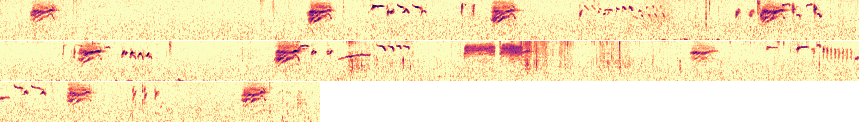

In [ ]:
query_rec = (user_recs
    .loc['20180805-60c3']  # BEWR
    .pipe(projection.with_audio, lambda audio: audio[6500:])
)
print(rec_str_line(query_rec))
display(rec_probs(query_rec, search, 15))
plot_spectro_micro(query_rec, features, wrap=True,
    show_audio=False,
    # limit_s=60,
)

 36.6  XC169517  BEWR  98.0s  B  call, song  United States/Arizona/Yavapai/Prescott National Forest (near  Prescott)  2014-03-10  Micah Riegner[by-nc-sa]


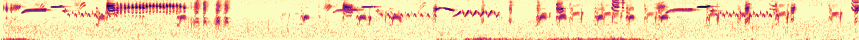

 36.8  XC217841  BEWR  80.0s  A  call  United States/California/San Diego County/near Dulzura/Otay Mountain  2013-03-28  Paul Marvin[by-nc-sa]


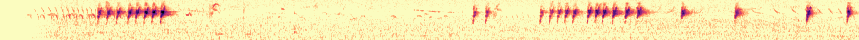

 37.0  XC282275  HOWR  230.7s  C  song  United States/New York/Nassau/Glen Cove  2015-05-03  Albert Lastukhin & Max Lastukhin[by-nc-sa]


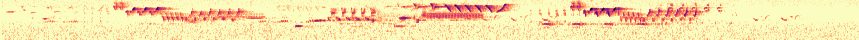

 37.3  XC89675  SOSP  51.7s  B  song  United States/Tennessee/Maryville/Kyker Bottoms Wildlife Refuge  2011-11-02  Mike Nelson[by-nc-nd]


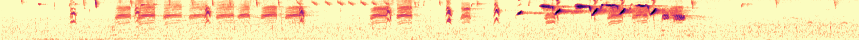

 37.6  XC158943  SPTO  84.4s  A  song  Canada/BC/Vancouver Island/Central Saanich/Island View Beach Regional Park  2012-07-07  Ian Cruickshank[by-nc-nd]


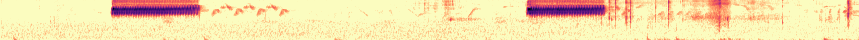

 37.7  XC231551  HOWR  25.9s  A  song  Mexico/Sinaloa/Barranca Rancho Liebre  2002-04-03  Peter Boesman[by-nc-nd]


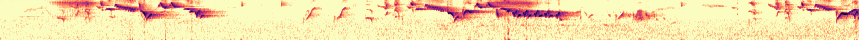

 37.7  XC334610  SOSP  95.6s  B  Sub-song, song  United States/California/Contra Costa County/Moraga  2016-09-11  Denise Wight[by-nc-sa]


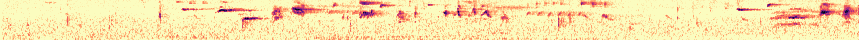

 38.2  XC142328  HOWR  26.7s  B  song  United States/Pennsylvania/Chester/Marsh Creek State Park  2013-07-07  Amy Davis[by-nc-sa]


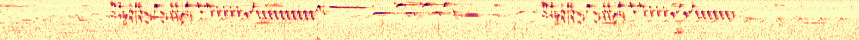

 38.6  XC159624  SOSP  92.3s  C  jumbled song  Canada/BC/Vancouver Island/Metchosin/Rocky Point Bird Observatory  2012-09-20  Ian Cruickshank[by-nc-nd]


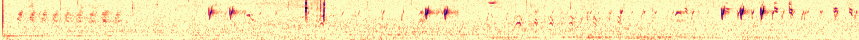

 39.0  XC358837  SOSP/maxillaris  31.3s  A  song  United States/California/Solano County/Grizzly Island Wildlife Area  2017-03-11  Jim Holmes[by-nc-sa]


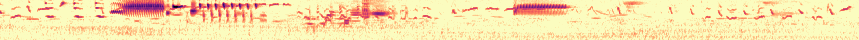

In [ ]:
# FIXME xc_recs.audio missing
results = rec_neighbors(query_rec, xc_recs, projection,
    # k=1,
    k=10,
    # k=50,
)
for result in df_rows(results):
    print(xc_rec_str_line(result, ('dist', '%5.1f')))
    plot_spectro_micro(result, features,
        show_audio=False,
        wrap=False,
    )

# Q: Is dist(feat) actually useful?
- SPTO: ... [simple starting point]

20180429-dcf3  2018-04-29T16:35:13  SPTO  1.1s  SPTO spotted towhee song- kings rd+cf59c361


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
species,SWTH,TRES,WTSW,HUVI,CHSP,BCTI,SCTA,SWSP,CARW,PUFI,PAWA,SAPH,MAWA,WAVI,SEWR
p,0.255,0.136,0.0791,0.0652,0.052,0.0378,0.0361,0.0323,0.0244,0.0236,0.0232,0.0201,0.0172,0.0142,0.0125


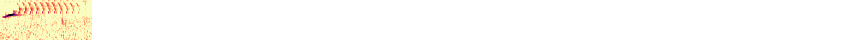

In [ ]:
# Slower SPTO trill
#   - Many more clean samples in this rec (all slow trills from same individual)
user_rec_spto_slow_clean = (user_recs
    .loc['20180429-dcf3']  # SPTO spotted towhee song- kings rd
    .pipe(projection.with_audio, lambda audio: audio[16840:17920])
)
print(rec_str_line(user_rec_spto_slow_clean))
display(rec_probs(user_rec_spto_slow_clean, search, 15))
plot_spectro_micro(user_rec_spto_slow_clean, features, wrap=True,
    show_audio=False,
    wrap_s=10,
)

20160716-6753  2016-07-16T16:47:33  SPTO  0.8s  SPTO spotted towhee+3663a316


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
species,DOWO,BBWA,WREN,MODO,OATI,CHSP,HAWO,AMRE,BEKI,PIWO,NRWS,CERW,GREG,RCSP,SWSP
p,0.401,0.0706,0.049,0.0408,0.0375,0.0325,0.0296,0.0286,0.0231,0.0229,0.0178,0.0157,0.0143,0.0138,0.0114


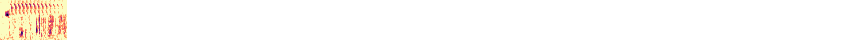

In [ ]:
# Faster SPTO trill
#   - Most samples are noisy in this rec, this is the cleanest one I found
user_rec_spto_fast_noisy = (user_recs
    .loc['20160716-6753']  # SPTO spotted towhee
    .pipe(projection.with_audio, lambda audio: audio[33_800:34_600])
)
print(rec_str_line(user_rec_spto_fast_noisy))
display(rec_probs(user_rec_spto_fast_noisy, search, 15))
plot_spectro_micro(user_rec_spto_fast_noisy, features, wrap=True,
    show_audio=False,
    wrap_s=10,
)

In [ ]:
# XXX
(xc_recs
    .assign(xc_id=lambda df: df.id.str.split('/').str[3].astype(int))
    .merge(how='left', on='xc_id', right=(xcs
        .rename(columns={'id': 'xc_id'})
        .drop(columns=['species', 'sci_name', 'com_name'])
    ))
    [:3]
)

,dataset,species,species_com_name,species_query,duration_s,samples_mb,samples_n,basename,species_longhand,id,path,audio,feat,xc_id,downloaded_x,subspecies_x,recordist_x,country_x,locality_x,type_x,quality_x,date_x,time_x,license_type_x,license_detail_x,license_x,url_x,download_x,spectro,downloaded_y,subspecies_y,recordist_y,country_y,locality_y,lat,lng,type_y,quality_y,date_y,time_y,license_type_y,license_detail_y,license_y,url_y,download_y
0,xc,HOWR,House Wren,HOWR,18.5,0.777,407187,audio,House Wren - HOWR,xc/data/HOWR/231546/audio,xc/data/HOWR/231546/audio.mp3,"box(unbox=xc/data/HOWR/231546/audio: 1 channels, 16 bit, sampled @ 22.05 kHz, 18.467s long)",[ 2.586e-02 -3.016e-02 -9.980e-02 -2.990e-02 -2.795e-02 8.013e-02 4.984e-02 -6.681e-02 -9.758e-03 1.494e-02\n 1.277e-01 -9.438e-02 4.653e-02 -4.996e-02 -1.880e-01 -1.4...,231546,True,,Peter Boesman,Mexico,"Cerro San Felipe (La Cumbre), Oaxaca",song,A,2001-03-11 00:00:00,09:00,by-nc-nd,4.0,//creativecommons.org/licenses/by-nc-nd/4.0/,https://www.xeno-canto.org/231546,//www.xeno-canto.org/231546/download,,True,,Peter Boesman,Mexico,"Cerro San Felipe (La Cumbre), Oaxaca",17.2,-96.6,song,A,2001-03-11 00:00:00,09:00,by-nc-nd,4.0,//creativecommons.org/licenses/by-nc-nd/4.0/,https://www.xeno-canto.org/231546,//www.xeno-canto.org/231546/download
1,xc,HOWR,House Wren,HOWR,119.0,5.020,2631168,audio,House Wren - HOWR,xc/data/HOWR/349362/audio,xc/data/HOWR/349362/audio.mp3,"box(unbox=xc/data/HOWR/349362/audio: 1 channels, 16 bit, sampled @ 22.05 kHz, 119.327s long)",[-7.860e-03 5.880e-02 -6.661e-02 -4.902e-02 5.141e-02 1.532e-01 -1.791e-02 -5.489e-02 4.094e-02 3.765e-02\n 1.696e-01 -8.331e-02 1.283e-01 -1.499e-01 -7.958e-02 -2.4...,349362,True,parkmanii,Richard E. Webster,Mexico,"Observatorio area, Sierra San Pedro Martir, Baja California",song,A,2001-06-15 00:00:00,12:30,by-nc-sa,4.0,//creativecommons.org/licenses/by-nc-sa/4.0/,https://www.xeno-canto.org/349362,//www.xeno-canto.org/349362/download,,True,parkmanii,Richard E. Webster,Mexico,"Observatorio area, Sierra San Pedro Martir, Baja California",31.0,-115.0,song,A,2001-06-15 00:00:00,12:30,by-nc-sa,4.0,//creativecommons.org/licenses/by-nc-sa/4.0/,https://www.xeno-canto.org/349362,//www.xeno-canto.org/349362/download
2,xc,HOWR,House Wren,HOWR,410.0,17.200,9032008,audio,House Wren - HOWR,xc/data/HOWR/188839/audio,xc/data/HOWR/188839/audio.mp3,"box(unbox=xc/data/HOWR/188839/audio: 1 channels, 16 bit, sampled @ 22.05 kHz, 409.615s long)",[ 1.812e-02 2.365e-02 9.023e-02 -7.079e-02 2.328e-02 5.679e-02 1.120e-02 -9.084e-02 2.515e-01 6.531e-03\n 6.497e-02 3.896e-02 1.264e-01 -7.187e-02 -9.535e-03 4.0...,188839,True,,Thomas G. Graves,United States,"El Chorro Regional Park, San Luis Obispo, CA",call,A,2014-04-12 00:00:00,10:33,by-nc-sa,4.0,//creativecommons.org/licenses/by-nc-sa/4.0/,https://www.xeno-canto.org/188839,//www.xeno-canto.org/188839/download,,True,,Thomas G. Graves,United States,"El Chorro Regional Park, San Luis Obispo, CA",35.3,-121.0,call,A,2014-04-12 00:00:00,10:33,by-nc-sa,4.0,//creativecommons.org/licenses/by-nc-sa/4.0/,https://www.xeno-canto.org/188839,//www.xeno-canto.org/188839/download


 25.9  XC159501  SPTO  44.2s  C  mew calls  Canada/BC/Vancouver Island/Victoria/Panama Flats  2012-09-07  Ian Cruickshank[by-nc-nd]


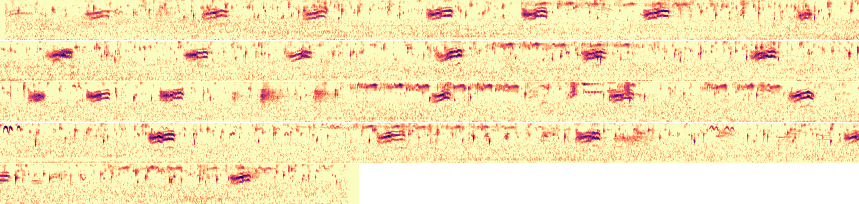

 26.3  XC158940  SPTO  1.9s  C  Song  Canada/BC/Vancouver Island/Central Saanich/Island View Beach Regional Park  2012-07-07  Ian Cruickshank[by-nc-nd]


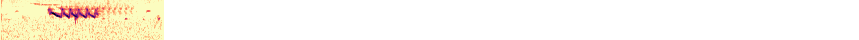

 26.5  XC159555  SPTO  58.7s  B  call  Canada/BC/Vancouver Island/Oak Bay/Uplands Park  2012-09-13  Ian Cruickshank[by-nc-nd]


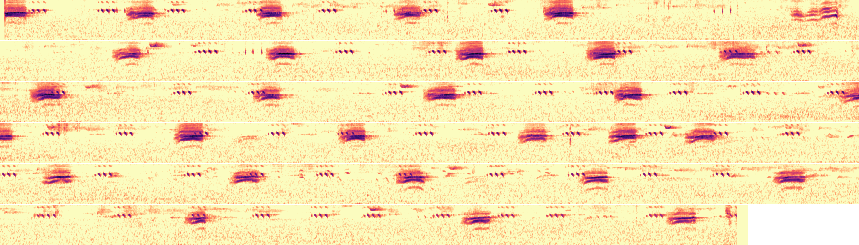

 26.8  XC331818  SPTO  1.6s  C  song  United States/Colorado/Larimer County/Sylvan Dale Guest Ranch  2016-07-08  Sue Riffe[by-nc-sa]


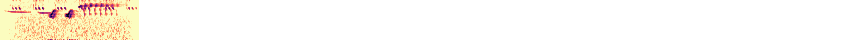

 27.3  XC156217  SPTO  29.5s  B  call  Canada/British Columbia/Vancouver Island/Oak Bay/Uplands Park  2011-06-17  Ian Cruickshank[by-nc-sa]


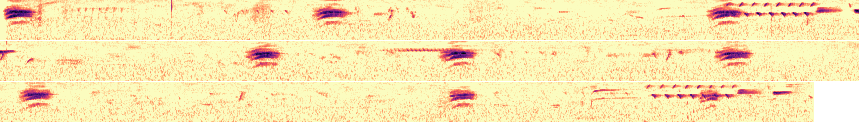

In [ ]:
query_rec = user_rec_spto_slow_clean
# query_rec = user_rec_spto_fast_noisy
results = rec_neighbors(query_rec=query_rec, projection=projection,
    search_recs=(xc_recs
        .query("species == 'SPTO'")
        # .query("quality.isin(['A'])")
    ),
    k=5,
)
for result in df_rows(results):
    print(xc_rec_str_line(result, ('dist', '%5.1f')))
    plot_spectro_micro(result, features,
        show_audio=False,
        # wrap=False,
    )